# Exploring the Athena X-IFU WHIM Data Challenge

One task for Athena X-IFU will be measuring the Warm-Hot Intergalactic Medium (WHIM) via absorption spectroscopy. While WHIM itself does not emit X-rays, it will produce absorption lines in the X-ray spectra of bright Gamma-ray Burst (GRB) afterglows. This is important for solving the missing baryon problem.

How well Athena will be able to measure the WHIM depends on how well it is going to be able to identify lines in GRB afterglows. To this purpose, the Athena X-IFU WHIM Data Challenge was called into existence. The point here is figure out the best way to identify lines and their redshift, and find the method that has the highest detection probability for the weak lines expected from WHIM.

## Exploring the Simulations

Let's first actually look at the data, so that we can set up an appropriate model.

### Imports

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

import glob

import numpy as np
import pandas as pd

import sherpa.astro.ui
import astropy.io.fits as fits

datadir = "../data/"

failed to import sherpa.image.ds9_backend due to 
'RuntimeErr: DS9Win unusable: Could not find ds9 on your PATH'


Before we do anything clever, I want to have a look at the FITS files so that I know what's going on:

In [2]:
import sherpa

In [3]:
sherpa.__version__

'4.9.0'

In [4]:
hdulist = fits.open("../data/47.pha")
hdulist

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x10d83f710>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x10d851048>]

In [5]:
hdr = hdulist[0].header

In [6]:
hdr

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 

What's in the data extension?

In [7]:
hdulist[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                    8 / width of table in bytes                        
NAXIS2  =                29874 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2 / number of fields in each row                   
TTYPE1  = 'CHANNEL '           / label for field   1                            
TFORM1  = 'J       '           / data format of field: 4-byte INTEGER           
TTYPE2  = 'COUNTS  '           / label for field   2                            
TFORM2  = 'J       '           / data format of field: 4-byte INTEGER           
EXTNAME = 'SPECTRUM'        

In [8]:
hdulist[1].columns

ColDefs(
    name = 'CHANNEL'; format = 'J'
    name = 'COUNTS'; format = 'J'
)

Hmm, so it doesn't look like I have energy information for each bin. Maybe the ARF/RMF files do?

In [9]:
arf_hdulist = fits.open(datadir+"athena_xifu_sixte_1469_onaxis_v20150402.arf")

In [10]:
arf_hdulist.info()

Filename: ../data/athena_xifu_sixte_1469_onaxis_v20150402.arf
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       8   ()      
  1  SPECRESP    BinTableHDU     31   29874R x 3C   [D, D, D]   


In [11]:
e_low = arf_hdulist[1].data.field("ENERG_LO")
e_high = arf_hdulist[1].data.field("ENERG_HI")

What about the RMF?

In [12]:
rmf_hdulist = fits.open(datadir+"athena_xifu_rmf_highres_v20150609.rmf")

In [13]:
rmf_hdulist.info()

Filename: ../data/athena_xifu_rmf_highres_v20150609.rmf
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       8   ()      
  1  EBOUNDS     BinTableHDU     32   29874R x 3C   [J, D, D]   
  2  MATRIX      BinTableHDU     46   29874R x 6C   [D, D, J, J, J, 92D]   


In [14]:
rmf_hdulist[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   20 / width of table in bytes                        
NAXIS2  =                29874 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3 / number of fields in each row                   
TTYPE1  = 'CHANNEL '           / label for field   1                            
TFORM1  = 'J       '           / data format of field: 4-byte INTEGER           
TTYPE2  = 'E_MIN   '           / label for field   2                            
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE3  = 'E_MAX   '        

In [15]:
rmf_data = rmf_hdulist[2].data

In [16]:
rmf_data.columns

ColDefs(
    name = 'ENERG_LO'; format = 'D'; unit = 'keV'
    name = 'ENERG_HI'; format = 'D'; unit = 'keV'
    name = 'N_GRP'; format = 'J'
    name = 'F_CHAN'; format = 'J'
    name = 'N_CHAN'; format = 'J'
    name = 'MATRIX'; format = '92D'; dim = '(92)'
)

In [17]:
datadir = "../data/"
datafiles = glob.glob(datadir+"*.pha")
print(datafiles)

['../data/01.pha', '../data/02.pha', '../data/03.pha', '../data/04.pha', '../data/05.pha', '../data/06.pha', '../data/07.pha', '../data/08.pha', '../data/09.pha', '../data/10.pha', '../data/11.pha', '../data/12.pha', '../data/13.pha', '../data/14.pha', '../data/15.pha', '../data/16.pha', '../data/17.pha', '../data/18.pha', '../data/19.pha', '../data/20.pha', '../data/21.pha', '../data/22.pha', '../data/23.pha', '../data/24.pha', '../data/25.pha', '../data/26.pha', '../data/27.pha', '../data/28.pha', '../data/29.pha', '../data/30.pha', '../data/31.pha', '../data/32.pha', '../data/33.pha', '../data/34.pha', '../data/35.pha', '../data/36.pha', '../data/37.pha', '../data/38.pha', '../data/39.pha', '../data/40.pha', '../data/41.pha', '../data/42.pha', '../data/43.pha', '../data/44.pha', '../data/45.pha', '../data/46.pha', '../data/47.pha', '../data/48.pha', '../data/49.pha', '../data/50.pha']


### Sherpa model of the data

Let's build a simple sherpa model of a galactic abundance and a power law:

In [18]:
sherpa.astro.ui.load_data("../data/47.pha")

read ARF file ../data/athena_xifu_sixte_1469_onaxis_v20150402.arf


In [19]:
d = sherpa.astro.ui.get_data()

In [20]:
arf = d.get_arf()

In [21]:
arf

<DataARF data set instance '../data/athena_xifu_sixte_1469_onaxis_v20150402.arf'>

In [22]:
rmf = d.get_rmf()

In [23]:
rmf

In [25]:
for i,f in enumerate(datafiles):
    sherpa.astro.ui.load_data(id="%i"%(i+1), filename=datadir+f)


read ARF file ../data/../data/athena_xifu_sixte_1469_onaxis_v20150402.arf
read ARF file ../data/../data/athena_xifu_sixte_1469_onaxis_v20150402.arf
read ARF file ../data/../data/athena_xifu_sixte_1469_onaxis_v20150402.arf
read ARF file ../data/../data/athena_xifu_sixte_1469_onaxis_v20150402.arf
read ARF file ../data/../data/athena_xifu_sixte_1469_onaxis_v20150402.arf
read ARF file ../data/../data/athena_xifu_sixte_1469_onaxis_v20150402.arf
read ARF file ../data/../data/athena_xifu_sixte_1469_onaxis_v20150402.arf
read ARF file ../data/../data/athena_xifu_sixte_1469_onaxis_v20150402.arf
read ARF file ../data/../data/athena_xifu_sixte_1469_onaxis_v20150402.arf
read ARF file ../data/../data/athena_xifu_sixte_1469_onaxis_v20150402.arf
read ARF file ../data/../data/athena_xifu_sixte_1469_onaxis_v20150402.arf
read ARF file ../data/../data/athena_xifu_sixte_1469_onaxis_v20150402.arf
read ARF file ../data/../data/athena_xifu_sixte_1469_onaxis_v20150402.arf
read ARF file ../data/../data/athena_x

In [26]:
d1 = sherpa.astro.ui.get_data("1")

In [27]:
energy = d1.get_x()

<IPython.core.display.Javascript object>


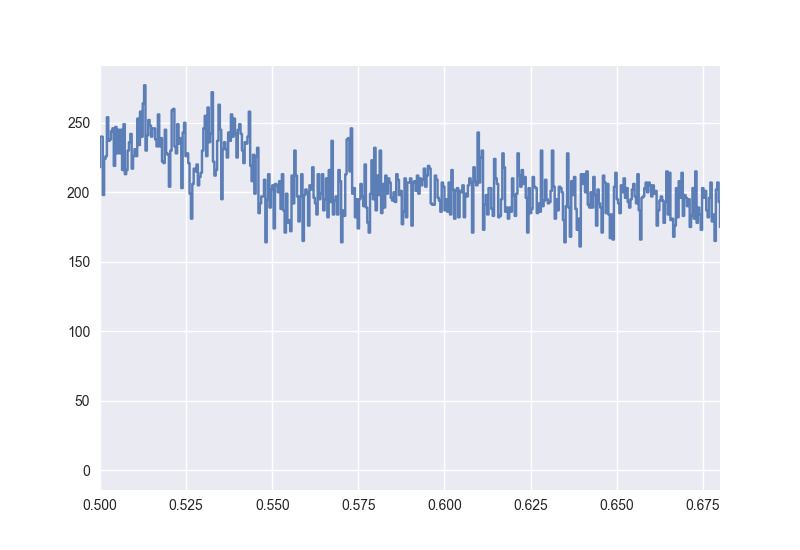

(0.5, 0.68)

In [30]:
plt.figure()
plt.plot(energy, d1.counts, label="HEG P1", alpha=0.9,
         c=sns.color_palette()[0], linestyle="steps-mid")

plt.xlim(0.5, 0.68)


## Line Search Strategy

In the original document, the line search strategy is between 250 and 584 eV for the OVII line and 250 to 754 eV for the OVII and OVIII line. They use Gaussian statistics, i.e. rebin the data, which we are not going to do.

**Question**: Do I need to worry about over-sampling?

The authors then do a blind fit to the continuum, followed by a blind line search in the range between $0 \leq z \leq 0.1$, considering the simple case of a WHIM line in the nearby IGM.
The search is performed using Protassov et al (2002), searching at every energy for a line and producing a posterior predictive p-value for each line energy in its rest frame $E_0$ shifted to $(1+z)E_0$ while oversampling the detector resolution. They produce a new fit for each energy and test for the presence of a line using a significance test. 

**Question**: What are the priors used in the original approach?


### Why this approach is not ideal
* number of trials explodes!
* can only find lines at fixed redshift intervals, but redshift is a continuous number!
* cannot efficiently deal with multi-line inference!

### Can we build a better model?

We're going to stick this into `ShiftyLines` and see what happens! But first, let's look at the relevant energy ranges:

In [125]:
len(e_low)

29874

<IPython.core.display.Javascript object>


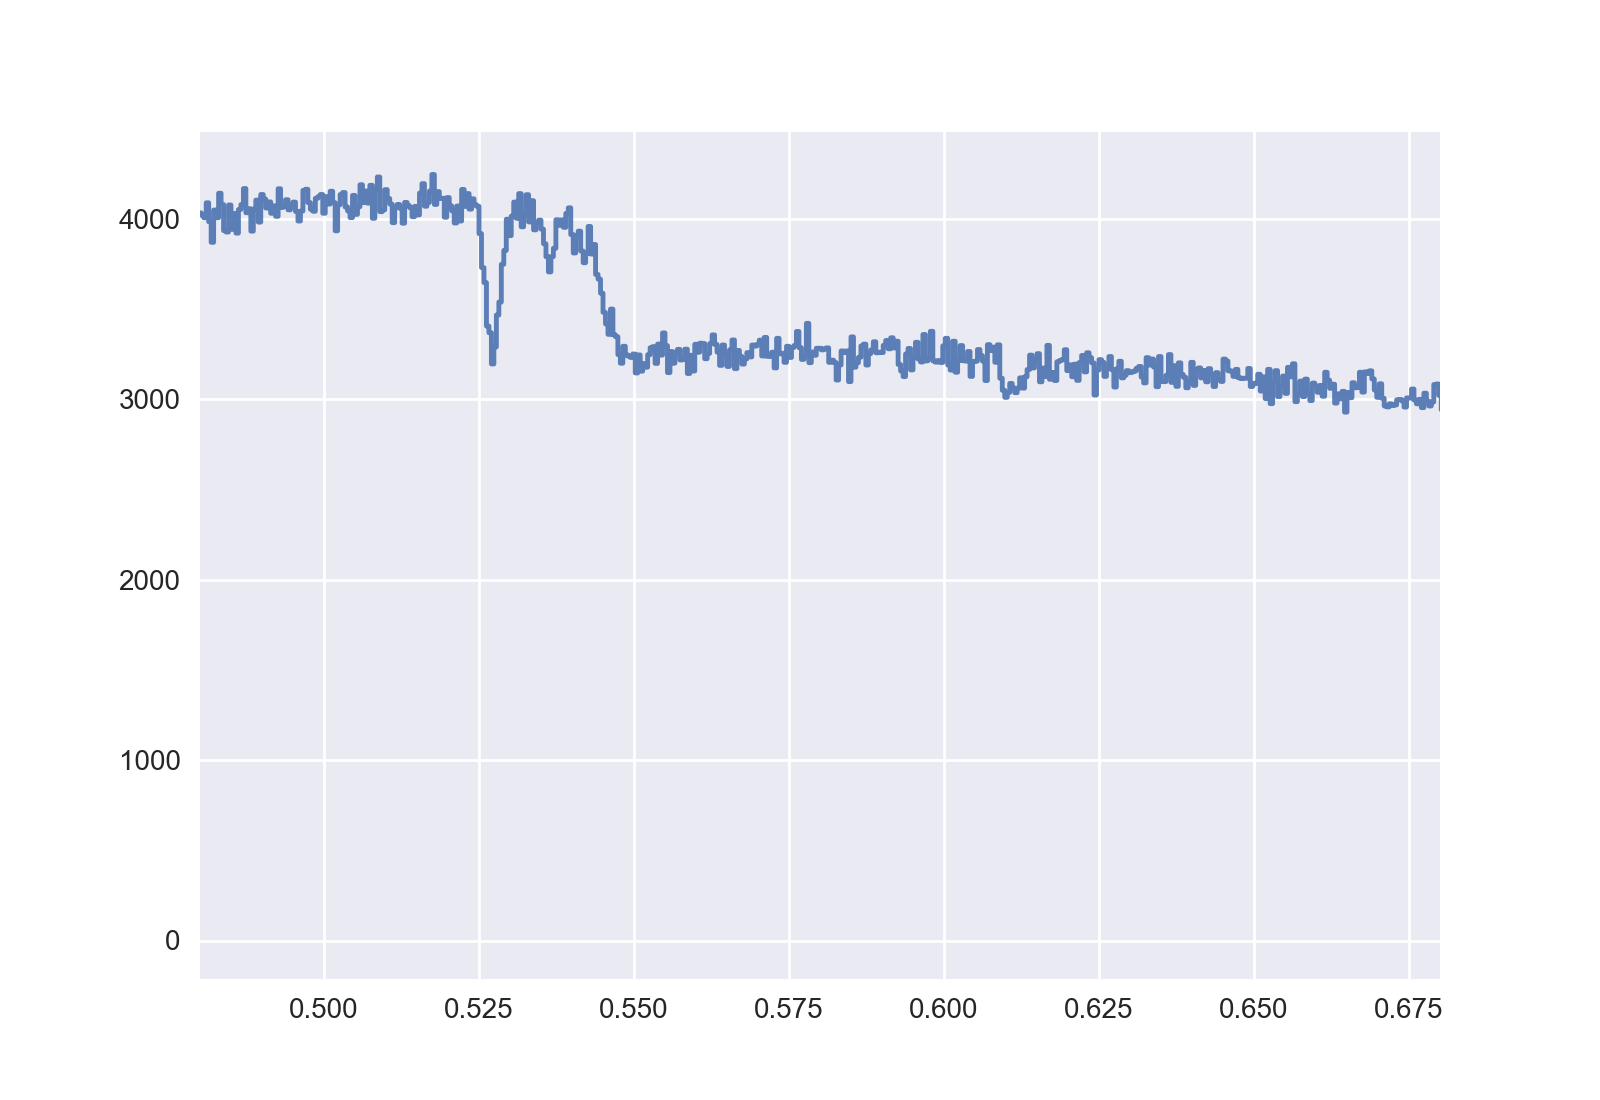

(0.48, 0.68)

In [126]:
x_min = 0.48
x_max = 0.68

d = sherpa.astro.ui.get_data("47")

plt.figure()
plt.plot(e_low, d.counts, alpha=0.9,
         c=sns.color_palette()[0], linestyle="steps-mid")

plt.xlim(x_min, x_max)


I have no idea whether there's a line in there. I know that there are different simulations (1) for a single line search versus two line search, (2) different equivalent widths, and (3) different starting fluxes of the GRB. And apparently also for different exposure times.

Let's plot all spectra, just so I know what I'm dealing with, including the two lines of interest:

In [127]:
0.574*(1.0-0.1)

0.5166

In [130]:
o_lines = [0.574, 0.654]

<IPython.core.display.Javascript object>


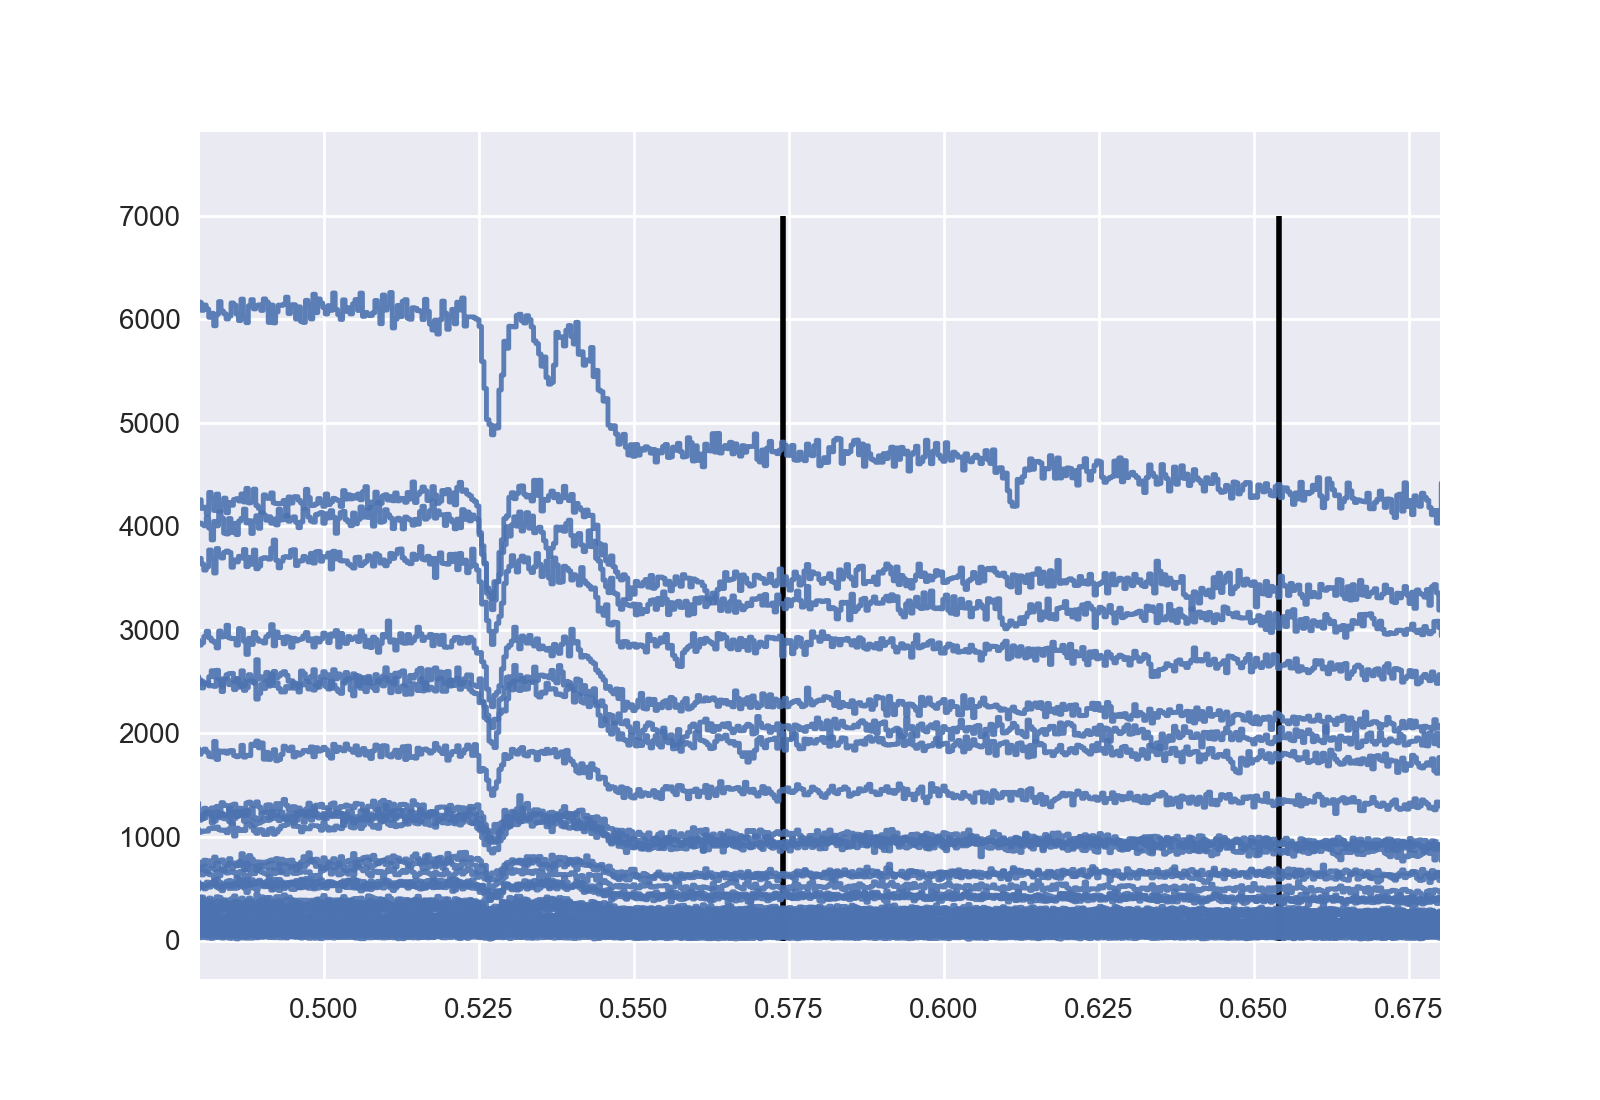

(0.48, 0.68)

In [129]:
plt.figure()

for i,f in enumerate(datafiles):
    d = sherpa.astro.ui.get_data("%i"%(i+1))
    plt.plot(e_low, d.counts, label="HEG P1", alpha=0.9,
             c=sns.color_palette()[0], linestyle="steps-mid")
    
for l in o_lines:
    plt.vlines(l, 0, 7000, lw=2, color="black")

plt.xlim(x_min, x_max)



According to the document, the lines are at different redshifts, so fine.

## First Attempt

The first attempt to run this with 2 lines on the first spectrum:

In [317]:
sample = np.loadtxt("../../atrytone/data/47_posterior_sample.txt")

The $log(Z) = -2580.20885111$.

In [318]:
sample.shape

(504, 918)

In [319]:
len(e_low)

29874

In [324]:
sample[0, 12:20]

array([ -9.10561000e-01,  -2.68938000e+00,  -8.01298000e+00,
        -7.88519000e+00,   1.04492000e-01,   4.05744000e-03,
         4.01204000e+03,   4.05793000e+03])

In [323]:
equivalent_widths(sample[0], o_lines)

array([ 1.34157625,  0.22650828])

### The Columns in the Sample File

* 0: background
* 1: noise_L
* 2: noise_sigma
* 3: number of parameters (I think)
* 4: number of possible Redshifts
* 5: log-amplitude hyper mean
* 6: log-amplitude hyper sigma
* 7: width hyper mean
* 8: width hyper sigma
* 9: threshold parameter
* 10: number of Doppler shifts
* 11: Doppler shift
* 12-XX: parameters for the lines, one per Doppler shift and per line
* XX-end: posterior sample spectrum

Let's plot the number of Doppler shifts:

<IPython.core.display.Javascript object>


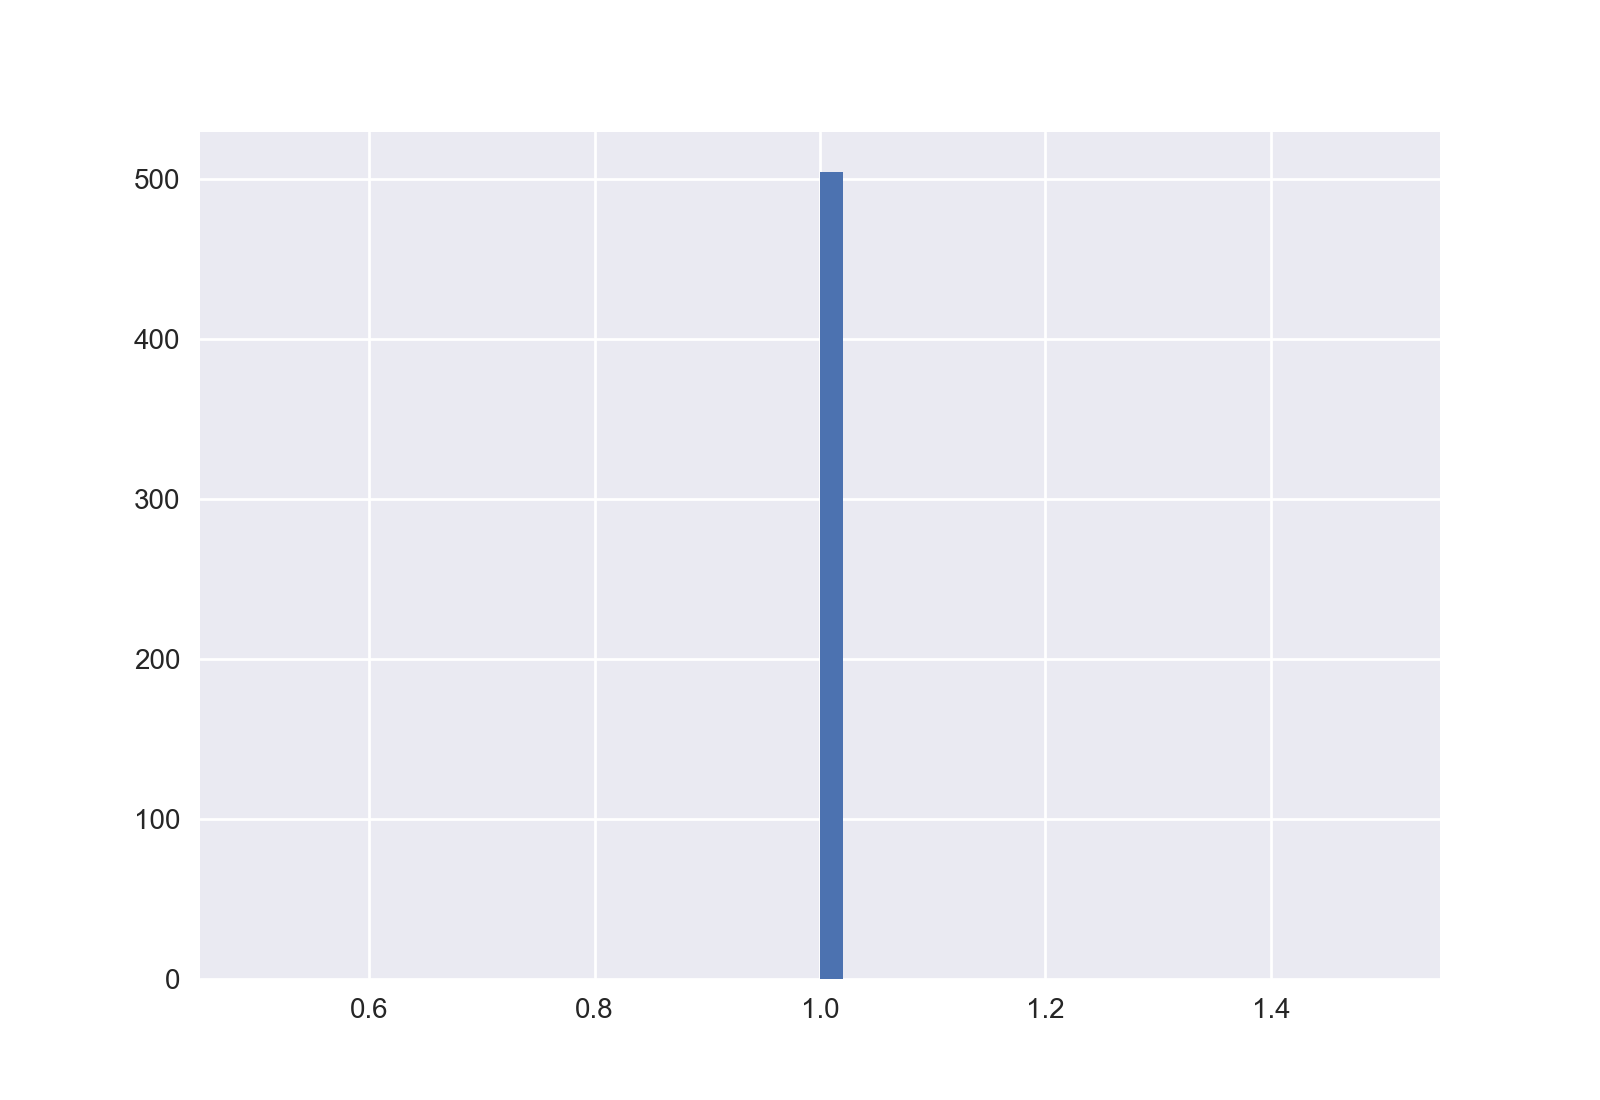

In [210]:
plt.figure()
plt.hist(sample[:,10], bins=50);

<IPython.core.display.Javascript object>


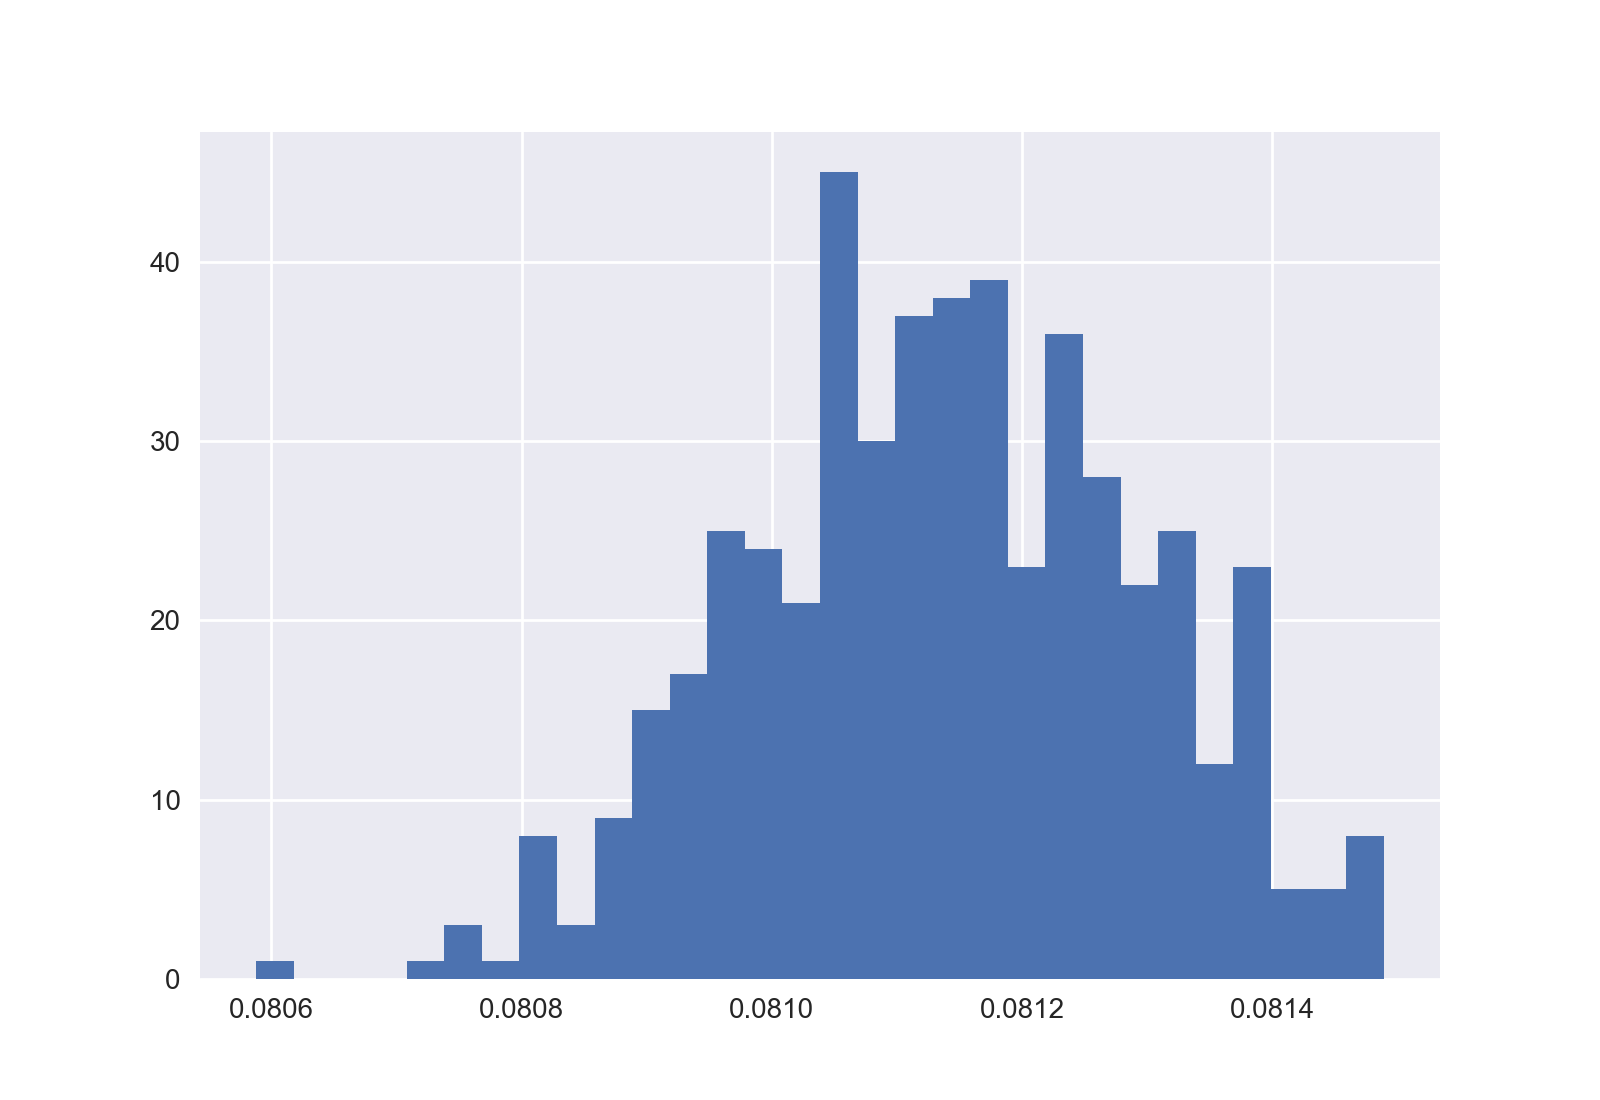

(array([  1.,   0.,   0.,   0.,   1.,   3.,   1.,   8.,   3.,   9.,  15.,
         17.,  25.,  24.,  21.,  45.,  30.,  37.,  38.,  39.,  23.,  36.,
         28.,  22.,  25.,  12.,  23.,   5.,   5.,   8.]),
 array([ 0.0805879 ,  0.08061794,  0.08064798,  0.08067802,  0.08070806,
         0.0807381 ,  0.08076814,  0.08079818,  0.08082822,  0.08085826,
         0.0808883 ,  0.08091834,  0.08094838,  0.08097842,  0.08100846,
         0.0810385 ,  0.08106854,  0.08109858,  0.08112862,  0.08115866,
         0.0811887 ,  0.08121874,  0.08124878,  0.08127882,  0.08130886,
         0.0813389 ,  0.08136894,  0.08139898,  0.08142902,  0.08145906,
         0.0814891 ]),
 <a list of 30 Patch objects>)

In [211]:
plt.figure()
plt.hist(sample[:,11], bins=30)

In [346]:
x_min = 0.25
x_max = 0.75

In [347]:
min_ind = e_low.searchsorted(x_min)
max_ind = e_low.searchsorted(x_max)

e_low_small = e_low[min_ind:max_ind]

<IPython.core.display.Javascript object>


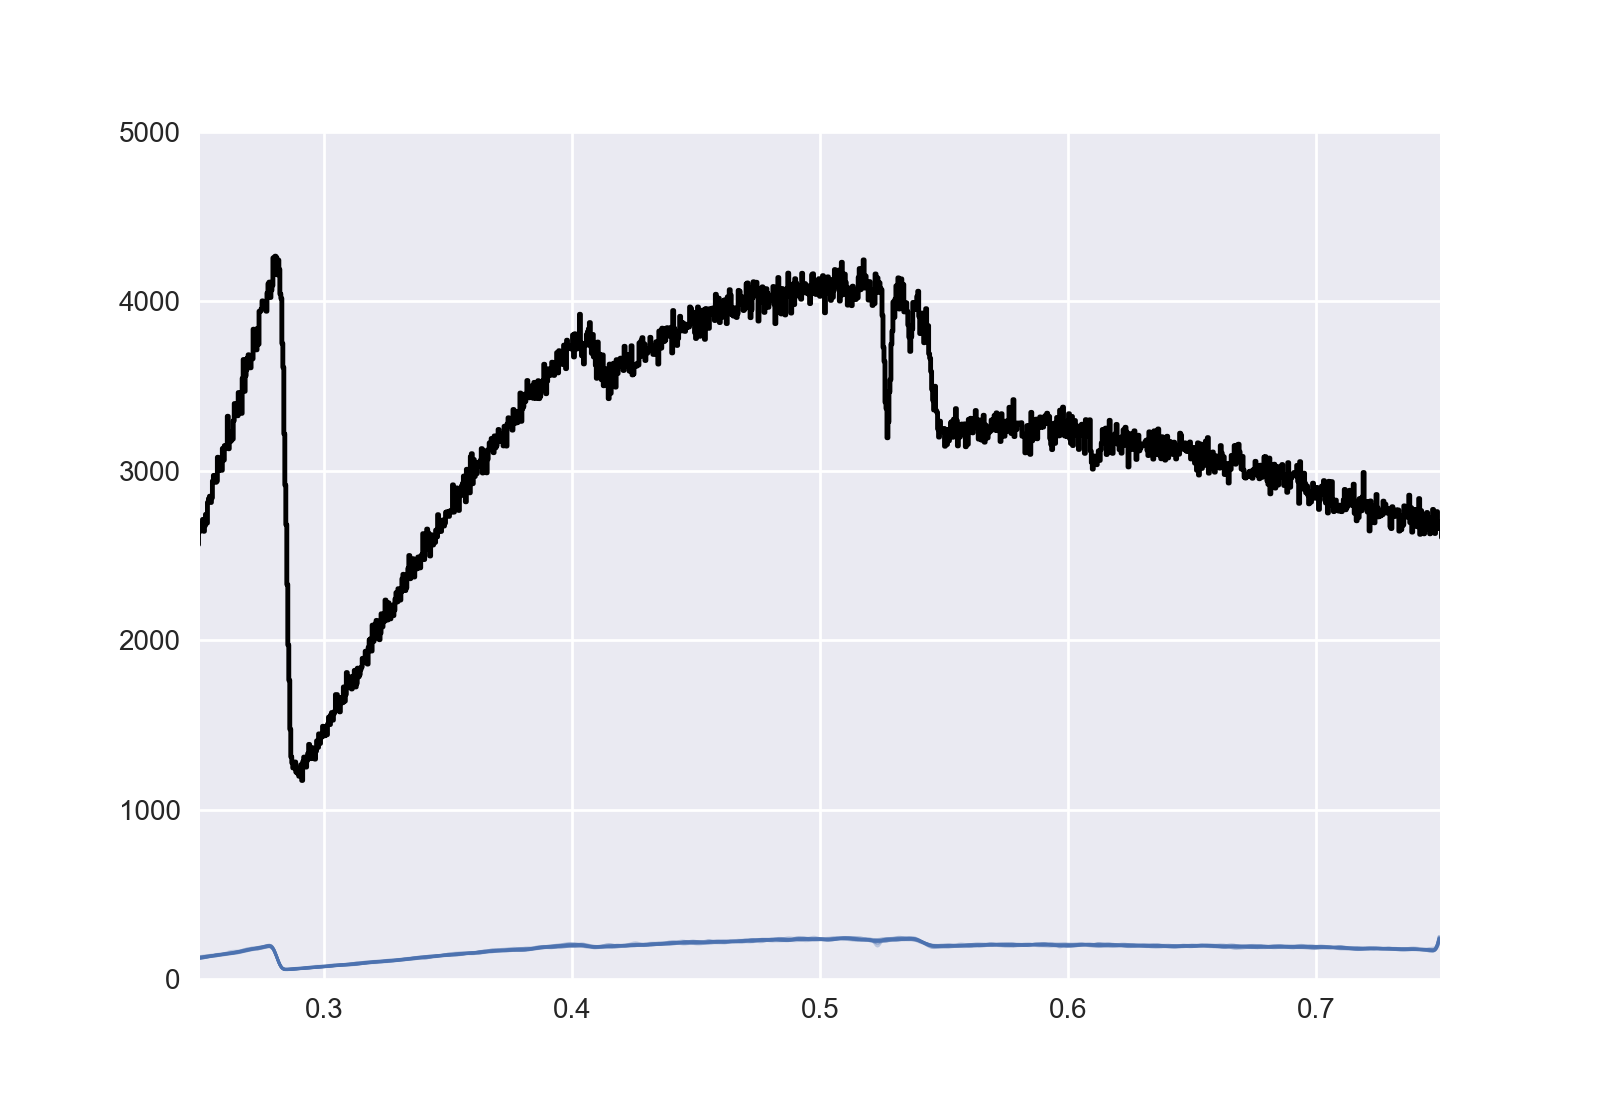

(0, 5000)

In [348]:
d = sherpa.astro.ui.get_data("47")
plt.figure()

plt.plot(e_low, d.counts, 
         c="black", linestyle="steps-mid")
    
for s in sample[-20:]:
    plt.plot(e_low_small, s[-len(e_low_small):], lw=1, 
             c=sns.color_palette()[0], alpha=0.3)
    
plt.xlim(x_min, x_max)
plt.ylim(0, 5000)



# Simulation 01

Let's start with simulation 1.

$log(z) = 

In [349]:
# the data
d = sherpa.astro.ui.get_data("1")

In [350]:
sample = np.loadtxt("../../atrytone/data/01_posterior_sample.txt")
print("There are %i samples in the posterior."%len(sample))

There are 409 samples in the posterior.


<IPython.core.display.Javascript object>


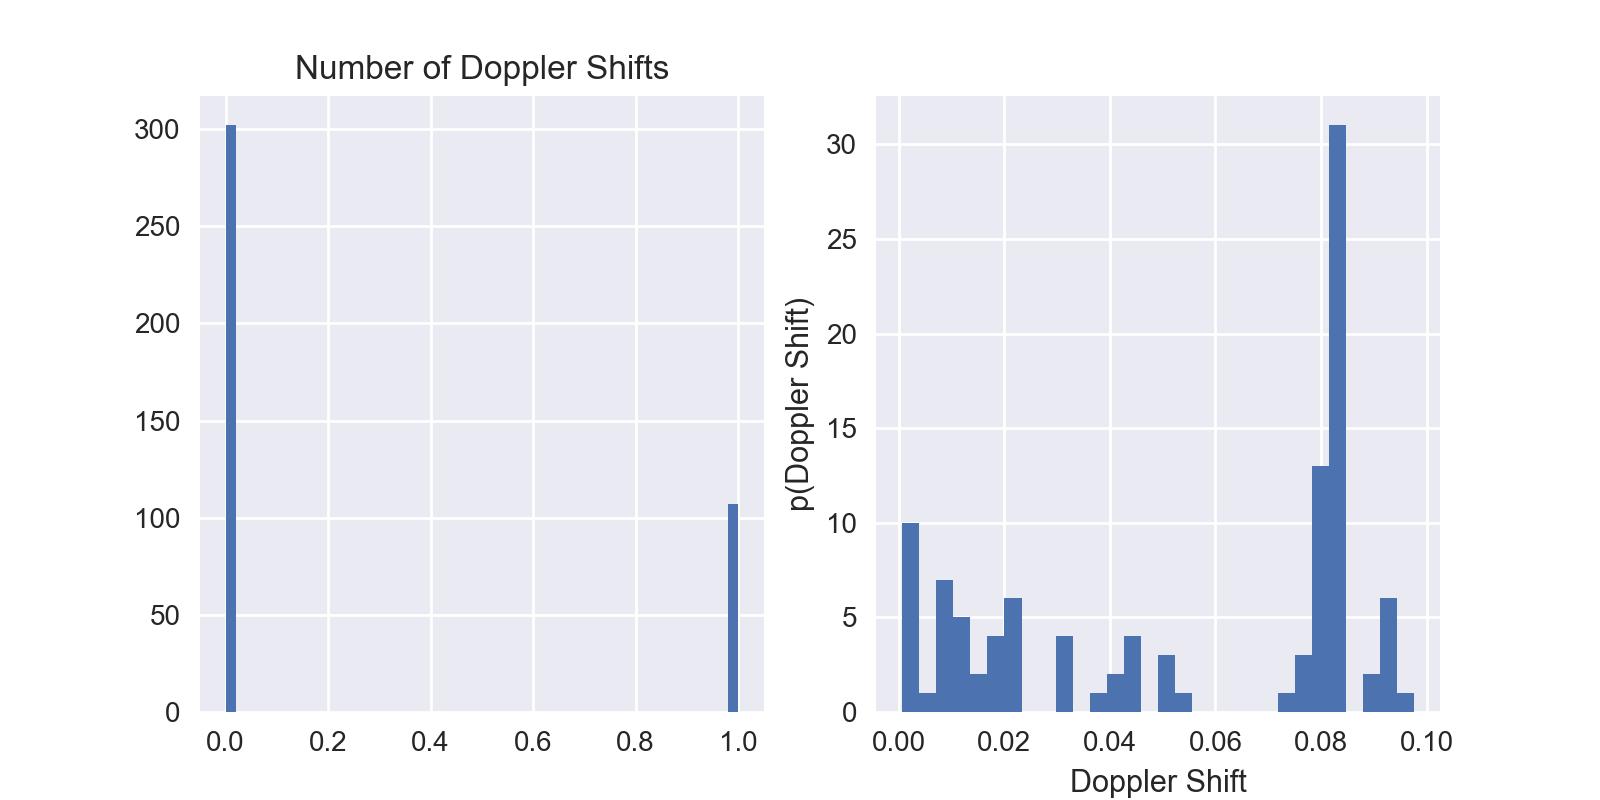

<IPython.core.display.Javascript object>


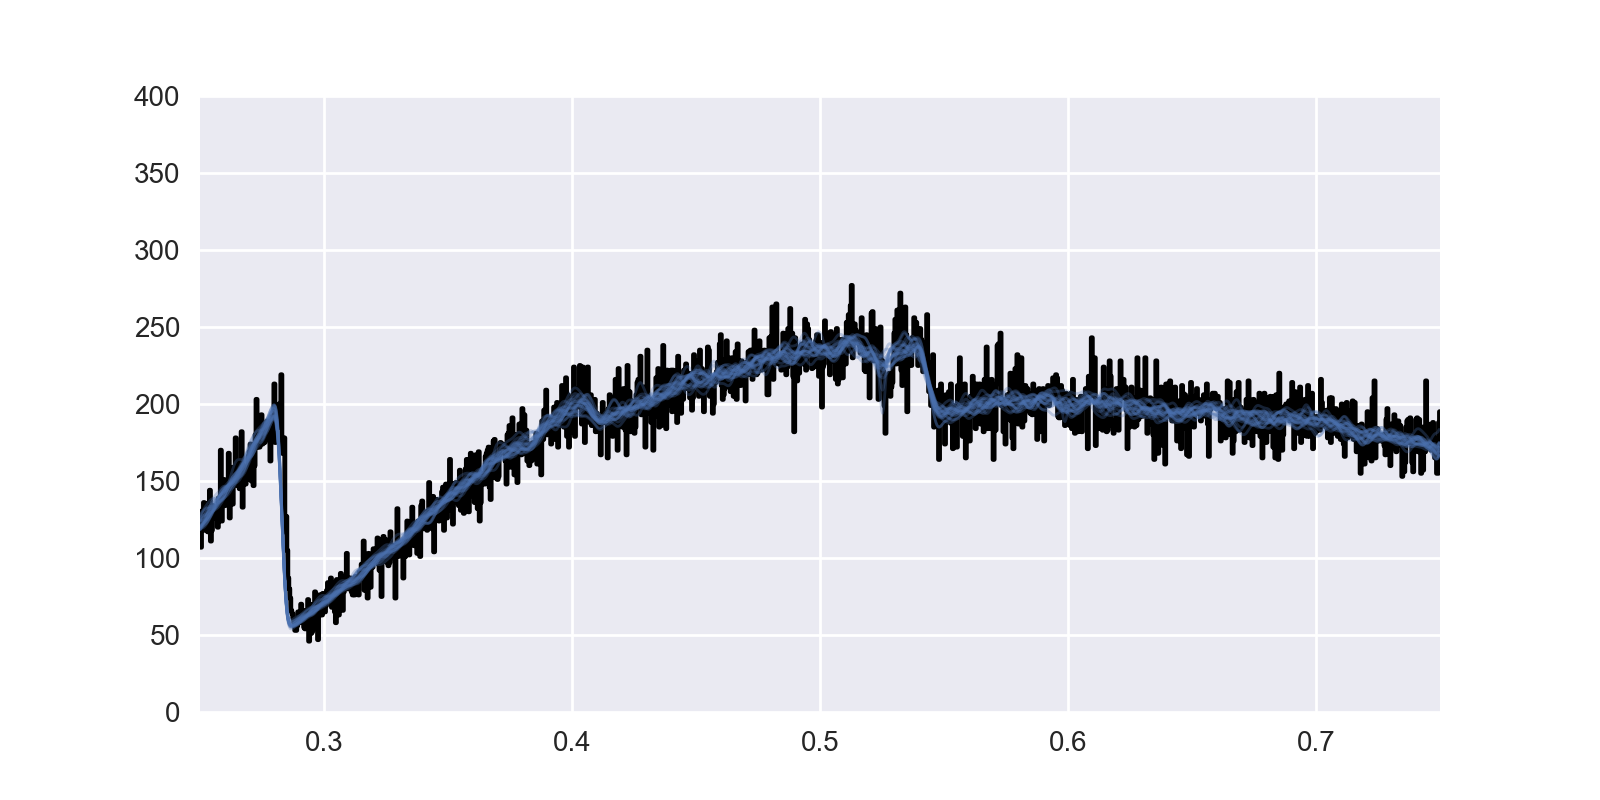

(0, 400)

In [356]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.hist(sample[:,10], bins=50);
ax1.set_title("Number of Doppler Shifts")

ax2.hist(sample[sample[:,11] != 0.0,11], bins=30)
ax2.set_xlabel("Doppler Shift")
ax2.set_ylabel("p(Doppler Shift)")

plt.figure(figsize=(8,4))
plt.plot(e_low, d.counts, 
         c="black", linestyle="steps-mid")
    
for s in sample[-20:]:
    plt.plot(e_low_small, s[-len(e_low_small)-5:-5], lw=1, 
             c=sns.color_palette()[0], alpha=0.3)
    
plt.xlim(x_min, x_max)
plt.ylim(0, 400)



What's the probability of having a Doppler shift in this source?

In [357]:
len(sample[sample[:,10]!= 0.0,11])/len(sample[:,10])

0.2616136919315403

What are the amplitudes?

In [358]:
istart = 12
ndoppler = 1

nd1 = len(sample[sample[:,10]!=0.0, 10])

amplitudes = np.zeros((nd1, len(o_lines)))


for i in range(len(o_lines)):
    amplitudes[:,i] = sample[sample[:,istart+i*ndoppler]!=0.0, istart+i*ndoppler]



<IPython.core.display.Javascript object>


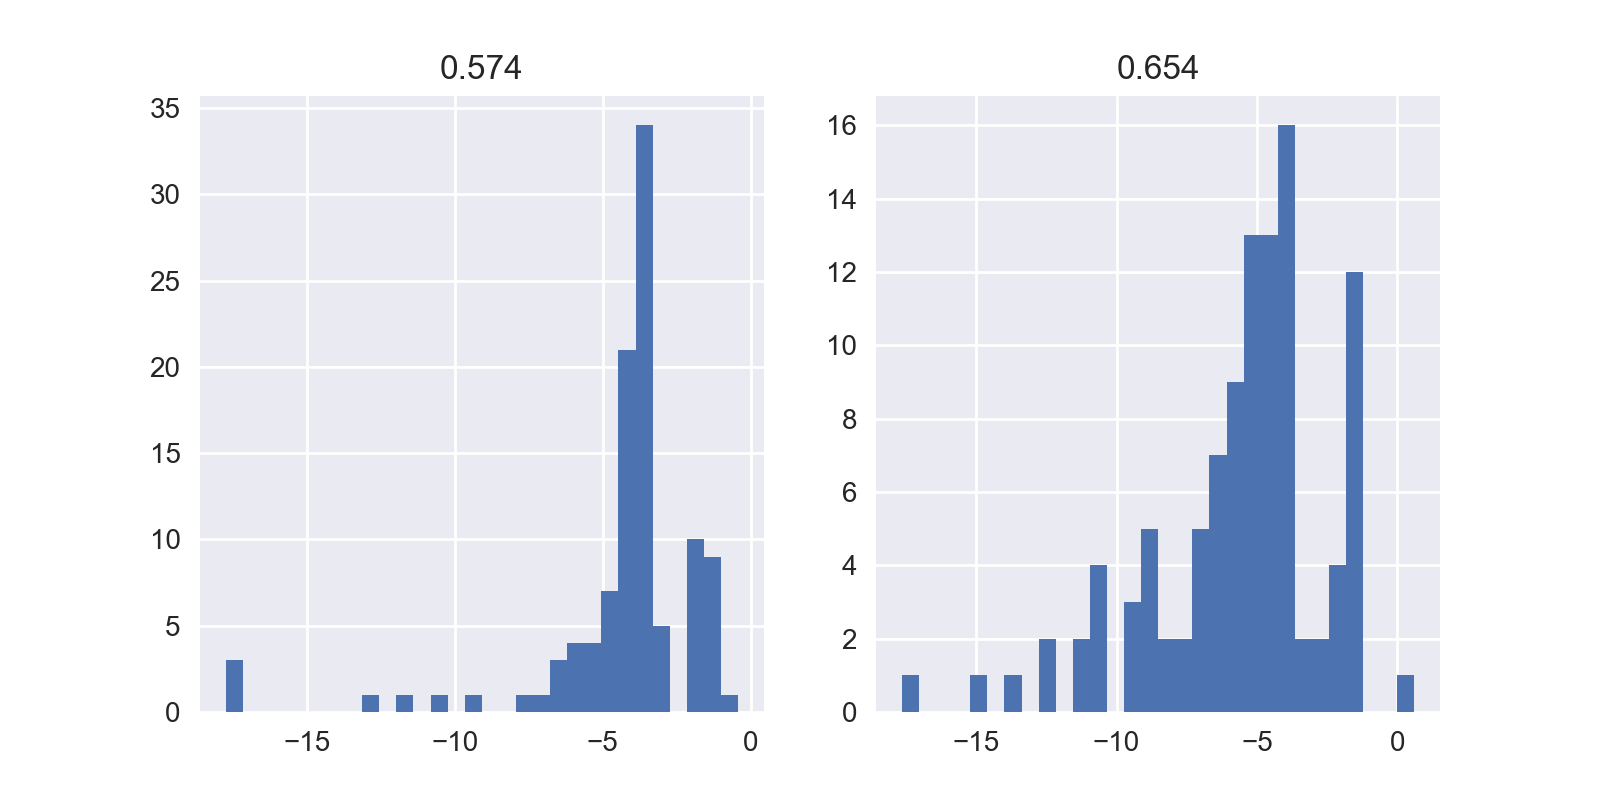

In [359]:
fig, axes = plt.subplots(1,2, figsize=(8,4))

axes = np.hstack(axes)

for i in range(len(o_lines)):
    a = amplitudes[:,i]
    axes[i].hist(a, bins=30)
    axes[i].set_title(o_lines[i])

What are the means and standard deviations of the amplitudes?

In [360]:
for i in range(amplitudes.shape[1]):
    print("Mean for amplitude for line at %.5f is %.5f +/- %.5f"%(o_lines[i], 
                                                                  np.mean(amplitudes[:,i]), 
                                                                  np.std(amplitudes[:,i])))

Mean for amplitude for line at 0.57400 is -4.32944 +/- 2.98967
Mean for amplitude for line at 0.65400 is -5.62011 +/- 3.13360


We have to compute the equivalent width of the two lines. For that, we're going to need (1) The Doppler shift of the line, (2) the shifted mean of the line, (3) the width and amplitude of the line, (4) the background

### The Columns in the Sample File

* 0: background
* 1: noise_L
* 2: noise_sigma
* 3: number of parameters (I think)
* 4: number of possible Redshifts
* 5: log-amplitude hyper mean
* 6: log-amplitude hyper sigma
* 7: width hyper mean
* 8: width hyper sigma
* 9: threshold parameter
* 10: number of Doppler shifts
* 11: Doppler shift
* 12-XX: parameters for the lines, one per Doppler shift and per line
* XX-end: posterior sample spectrum

In [361]:
ndoppler = 1

In [362]:
import scipy.special

def gaussian_cdf(x, x0, gamma):
    c = 0.5*(1. + scipy.special.erf((x-x0)/(gamma*np.sqrt(2.))))
    return c


This is the factor for converting keV into Angstrom

In [363]:
cfac = 12.3984191

In [367]:
def equivalent_widths(s, o_lines, cfac = 12.3984191, x_max=0.68):
    # background flux
    bkg = s[0]
    # threshold parameter for positive/negative sign
    thr = s[9]

    # number of doppler shifts in this model
    nd = s[10]
    
    # value of the doppler shift (will be zero if nd is zero)
    dop = s[11]

    ew = np.zeros(len(o_lines))

    if nd > 0:
        lpos = np.zeros(len(o_lines))
        amps = np.zeros(len(o_lines))
        widths = np.zeros(len(o_lines))
        sign = np.zeros(len(o_lines))
        test = np.zeros(len(o_lines))
        for i in range(len(o_lines)):
            lpos[i] = o_lines[i]*1./(1.0+dop)
            amps[i] = np.exp(s[istart+i*ndoppler])
            widths[i] = np.exp(s[istart+i*ndoppler+2])
            sign[i] = s[istart+i*ndoppler+4]

        lpos_angstrom = cfac/lpos
        widths_angstrom = cfac/widths

        for i in range(len(o_lines)):
            ew[i] = (amps[i]/bkg)*gaussian_cdf(x_max, lpos[i], widths[i])

    return ew


In [368]:
print(sample[2,10:20])
equivalent_widths(sample[2], o_lines, x_max=1)

[   0.       0.       0.       0.       0.       0.       0.       0.
  116.897  117.753]


array([ 0.,  0.])

In [369]:
ew = np.array([equivalent_widths(s, o_lines) for s in sample])

<IPython.core.display.Javascript object>


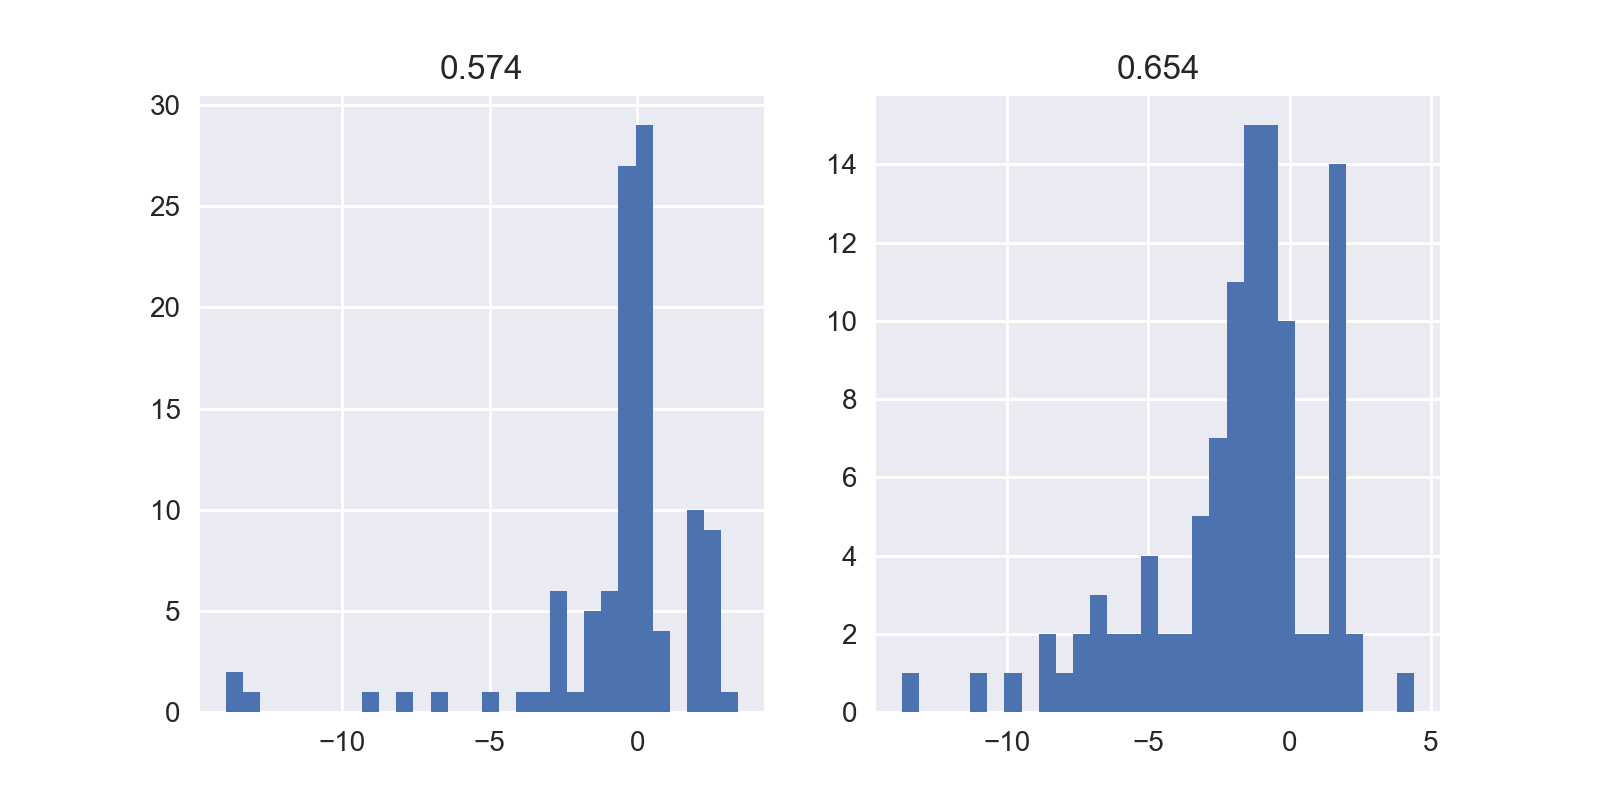

0.934457806514
0.277092576762


In [370]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))

for i, l in enumerate(o_lines):
    axes[i].hist(np.log(ew[ew[:,i]!= 0.0,i]), bins=30)
    print(np.median(ew[ew[:,i]!= 0.0,i]))
    axes[i].set_title(l)

In [371]:
for i in range(len(o_lines)):
    print("Equivalent width for line %.3f: %.5f +/ %.6f" %(o_lines[i], 
                                                           np.median(ew[ew[:,i]!= 0.0,i]), 
                                                           np.std(ew[ew[:,i]!= 0.0,i])))

Equivalent width for line 0.574: 0.93446 +/ 4.451956
Equivalent width for line 0.654: 0.27709 +/ 8.122545


Let's make a function of this:

In [372]:
def plot_ew(sample, o_lines):
    # calculate equivalent widths
    ew = np.array([equivalent_widths(s, o_lines) for s in sample])
    
    fig, axes = plt.subplots(1, 2, figsize=(8,4))

    for i, l in enumerate(o_lines):
        axes[i].hist(np.log(ew[ew[:,i]!= 0.0,i]), bins=30)
        print(np.median(ew[ew[:,i]!= 0.0,i]))
        axes[i].set_title(l)
        
    for i in range(len(o_lines)):
        print("Equivalent width for line %.3f: %.5f +/ %.6f" %(o_lines[i], 
                                                               np.median(ew[ew[:,i]!= 0.0,i]), 
                                                               np.std(ew[ew[:,i]!= 0.0,i])))
        
    return fig, axes

<IPython.core.display.Javascript object>


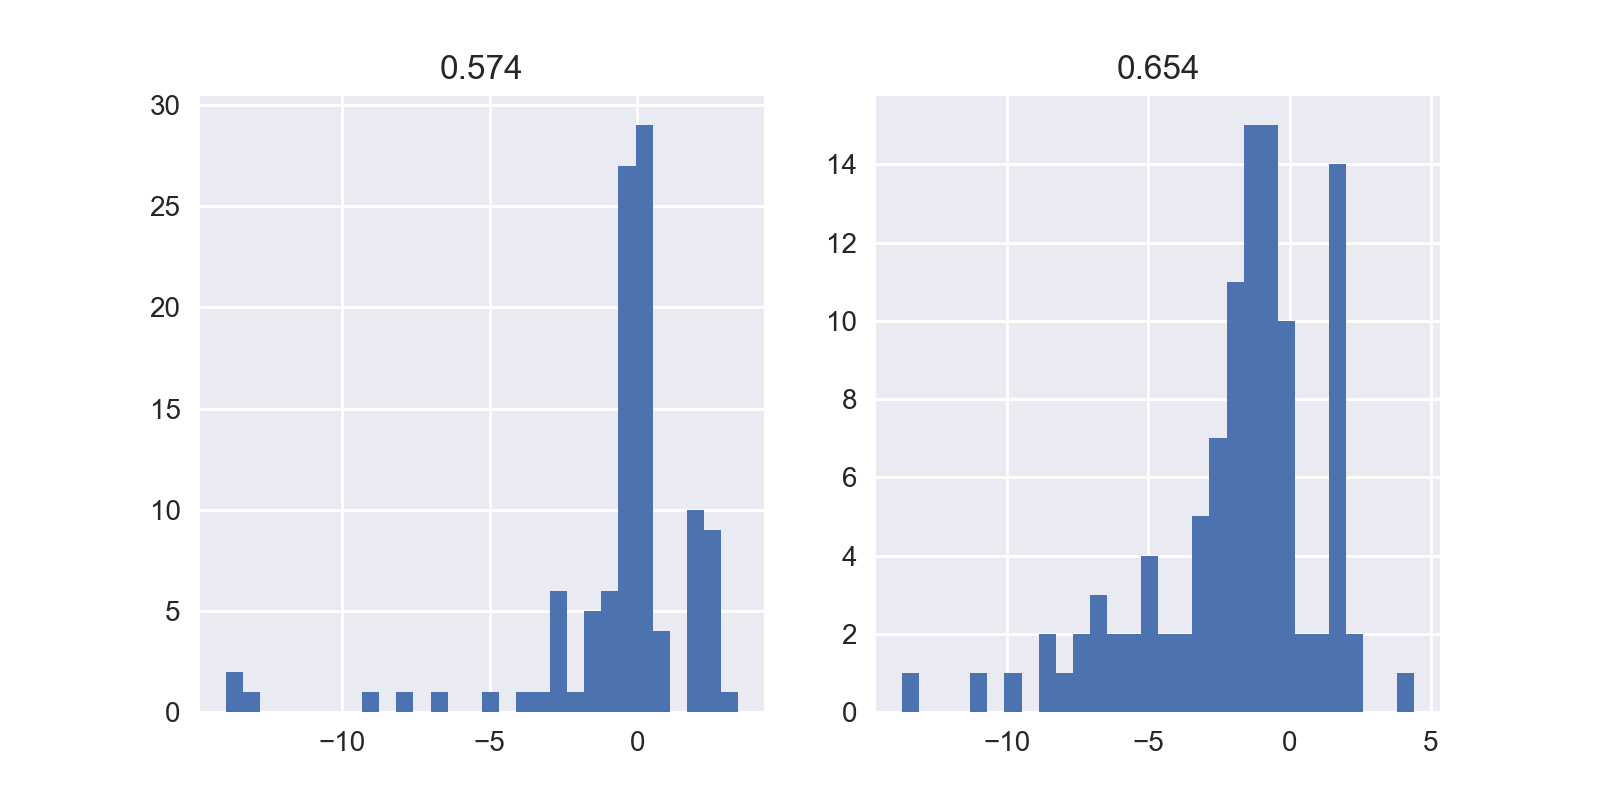

0.934457806514
0.277092576762
Equivalent width for line 0.574: 0.93446 +/ 4.451956
Equivalent width for line 0.654: 0.27709 +/ 8.122545


In [373]:
_, _ = plot_ew(sample, o_lines)

Let's make a function of all of it:

In [375]:
def plot_all(nsim, datadir="../data/"):
    
    # the rest energies of the two lines
    o_lines = [0.574, 0.654]
    
    # make a string for the correct data file to load
    if nsim < 10:
        dataid = "0" + str(nsim)
    else:
        dataid = str(nsim)
        
    datafile = datadir + dataid + ".pha"

    # use sherpa to load the data
    sherpa.astro.ui.load_data(id="%i"%nsim, filename=datafile)
    
    # get the data
    d = sherpa.astro.ui.get_data("%i"%nsim)
    
    # get the posterior sample
    sample = np.loadtxt(datadir+"%s_posterior_sample.txt"%dataid)
    print("There are %i samples in the posterior."%len(sample))

    # plot the number of Doppler shifts and the posterior distribution
    # of the Doppler shift itself if it's not zero (i.e. doesn't exist)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
    ax1.hist(sample[:,10], bins=50);
    ax1.set_title("Number of Doppler Shifts")

    ax2.hist(sample[sample[:,11] != 0.0,11], bins=30)
    ax2.set_xlabel("Doppler Shift")
    ax2.set_ylabel("p(Doppler Shift)")

    # plot posterior samples of the light curve
    plt.figure(figsize=(8,4))
    plt.plot(e_low, d.counts, 
             c="black", linestyle="steps-mid")

    for s in sample:
        plt.plot(e_low_small, s[-len(e_low_small)-5:-5], lw=1, 
                 c=sns.color_palette()[0], alpha=0.3)

    # set some sane y axis limits.
    s = sample[0, -len(e_low_small)-5:-5]
    y_min = 0
    y_max = np.max(s) + 20.0
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # compute the fraction of samples that have a Doppler shift
    p_doppler = len(sample[sample[:,10]!= 0.0,11])/len(sample[:,10])

    print("The probability that there is a signal in the data is %.4f"%p_doppler)
    
    # let's also plot the posteriors of the amplitudes
    
    # these are the needed indices
    istart = 12
    ndoppler = 1

    # the number of samples where there is a Doppler shift
    nd1 = len(sample[sample[:,10]!=0.0, 10])

    # empty array for the amplitudes
    amplitudes = np.zeros((nd1, len(o_lines)))

    # get the amplitudes out of the posterior sample
    for i in range(len(o_lines)):
        amplitudes[:,i] = sample[sample[:,istart+i*ndoppler]!=0.0, istart+i*ndoppler]

    # make a plot of the amplitudes
    fig, axes = plt.subplots(1,2, figsize=(8,4))

    axes = np.hstack(axes)

    for i in range(len(o_lines)):
        a = amplitudes[:,i]
        axes[i].hist(a, bins=30)
        axes[i].set_title(o_lines[i])
        
    # print the mean and standard deviation of the amplitudes.
    for i in range(amplitudes.shape[1]):
        print("Mean for amplitude for line at %.5f is %.5f +/- %.5f"%(o_lines[i], 
                                                                      np.mean(amplitudes[:,i]), 
                                                                      np.std(amplitudes[:,i])))

    # compute the equivalent widths
    ew = np.array([equivalent_widths(s, o_lines) for s in sample])

    # plot the equivalent widths
    _, _ = plot_ew(sample, o_lines)
    
    return


In [377]:
plot_all(1)

read ARF file ../data/athena_xifu_sixte_1469_onaxis_v20150402.arf


FileNotFoundError: [Errno 2] No such file or directory: '../data/01_posterior_sample.txt'

# Simulation 02

$log(z) = -1714.44199708$

In [116]:
# the data
d = sherpa.astro.ui.get_data("2")

# the posterior sample
sample = np.loadtxt("../../atrytone/data/02_posterior_sample.txt")

<IPython.core.display.Javascript object>


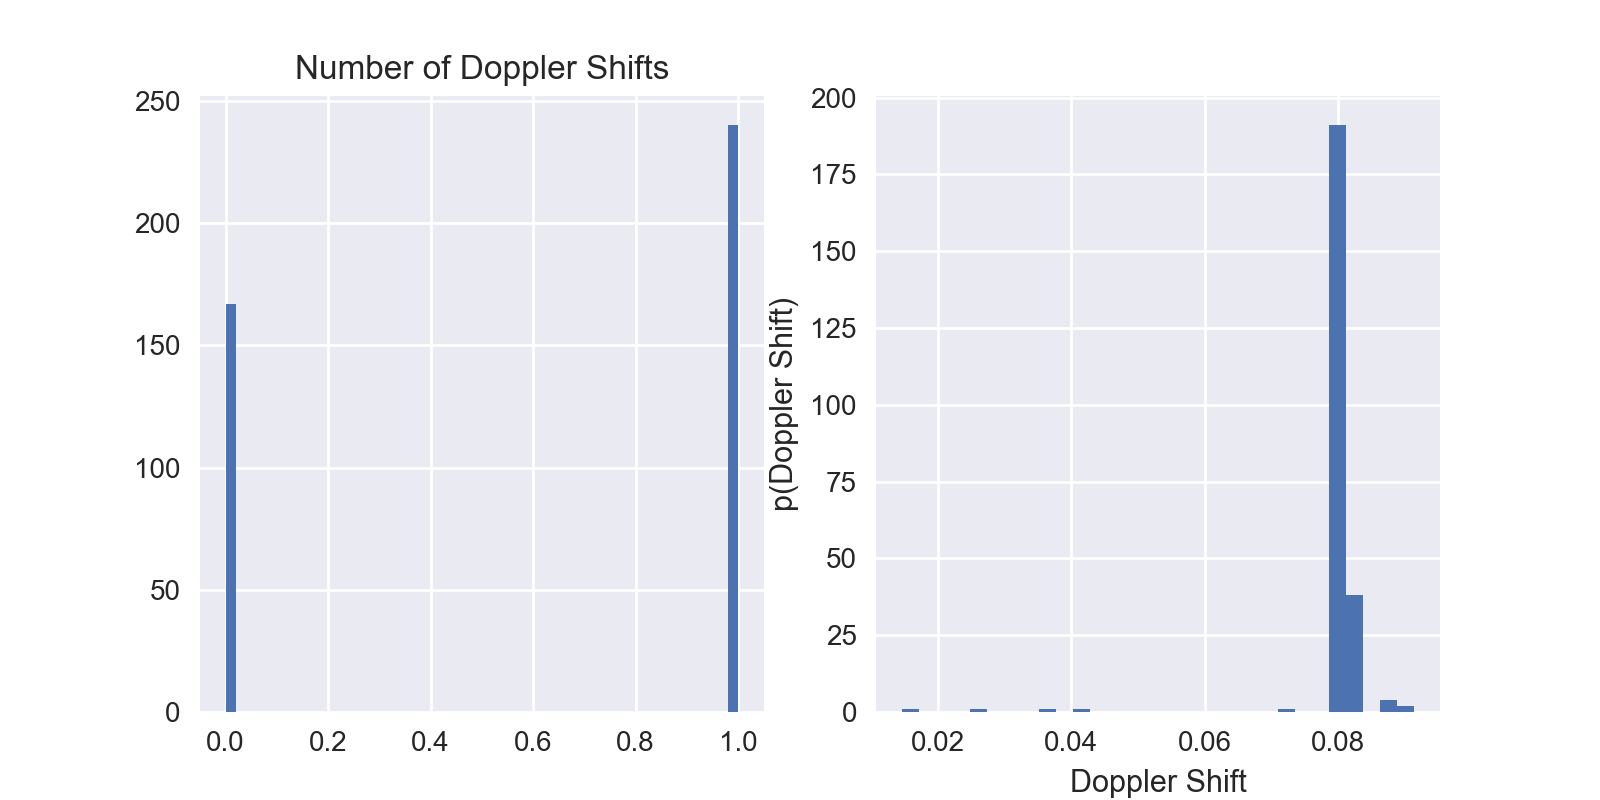

<IPython.core.display.Javascript object>


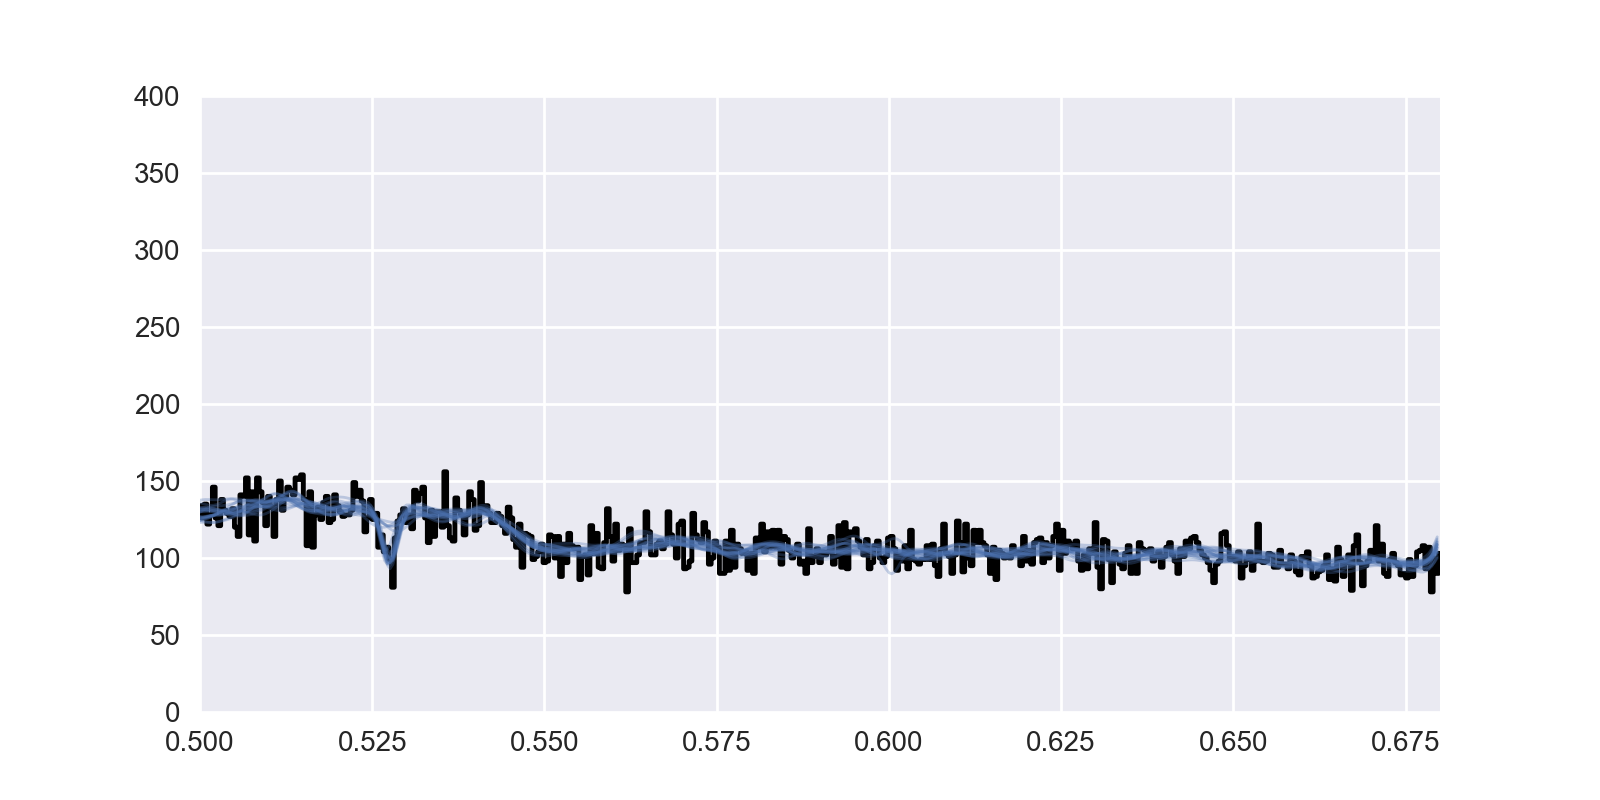

(0, 400)

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.hist(sample[:,10], bins=50);
ax1.set_title("Number of Doppler Shifts")

ax2.hist(sample[sample[:,11]!= 0.0,11], bins=30)
ax2.set_xlabel("Doppler Shift")
ax2.set_ylabel("p(Doppler Shift)")

plt.figure(figsize=(8,4))
plt.plot(e_low, d.counts, 
         c="black", linestyle="steps-mid")
    
for s in sample[-20:]:
    plt.plot(e_low_small, s[-len(e_low_small):], lw=1, 
             c=sns.color_palette()[0], alpha=0.3)
    
plt.xlim(x_min, x_max)
plt.ylim(0, 400)




What's the probability that's there a Doppler shift in there, too?

In [118]:
len(sample[sample[:,10]!= 0.0,11])/len(sample[:,10])

0.5896805896805897

# Simulation 03

$log(z) = -1604.30562265$

In [110]:
# the data
d = sherpa.astro.ui.get_data("3")

# the posterior sample
sample = np.loadtxt("../../atrytone/data/03_posterior_sample.txt")
print("There are %i samples in the posterior sample."%len(sample))

There are 252 samples in the posterior sample.


<IPython.core.display.Javascript object>


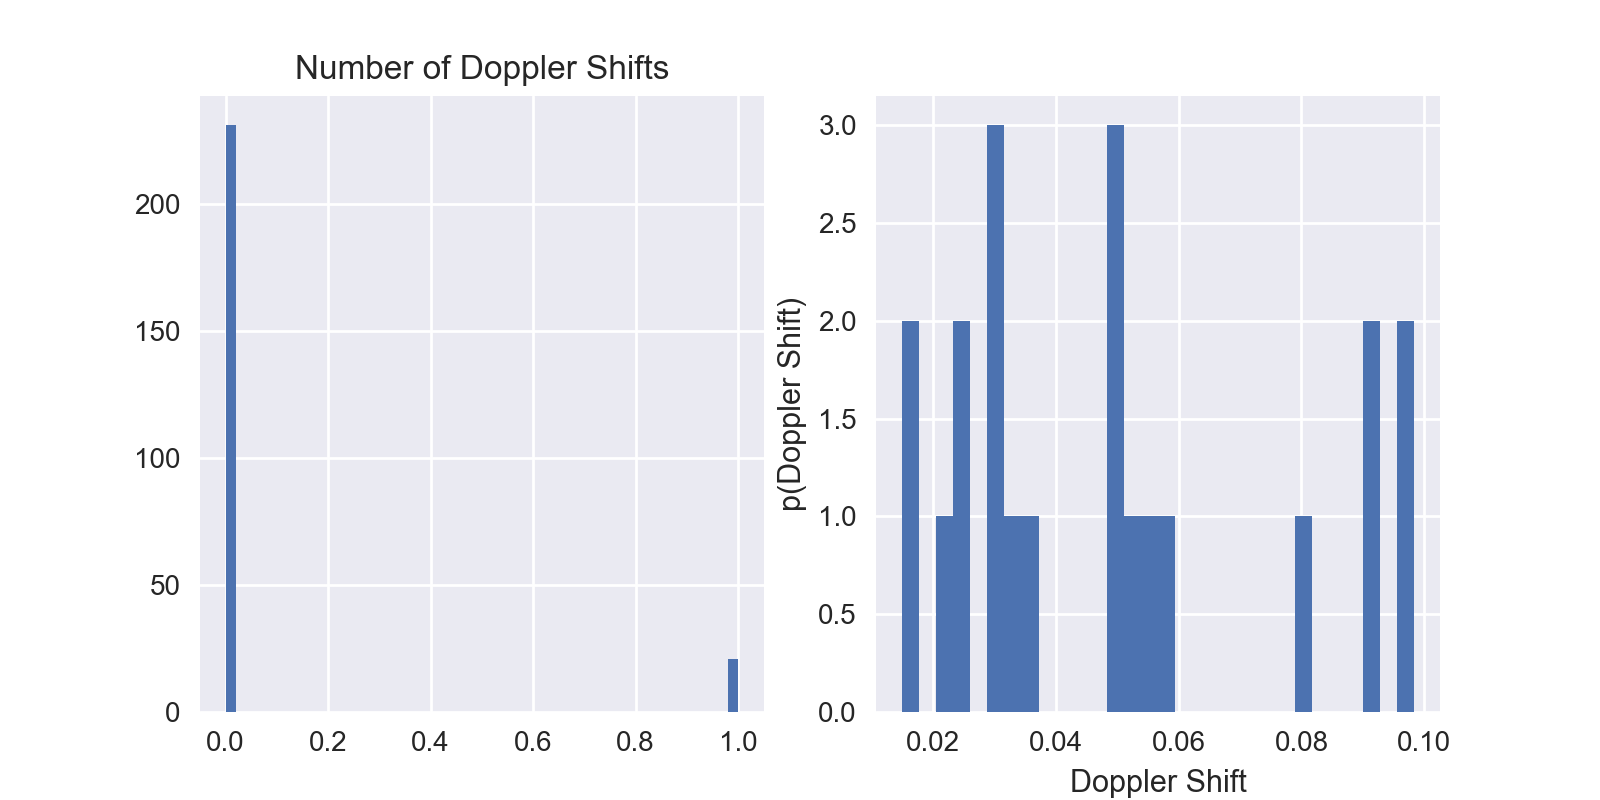

<IPython.core.display.Javascript object>


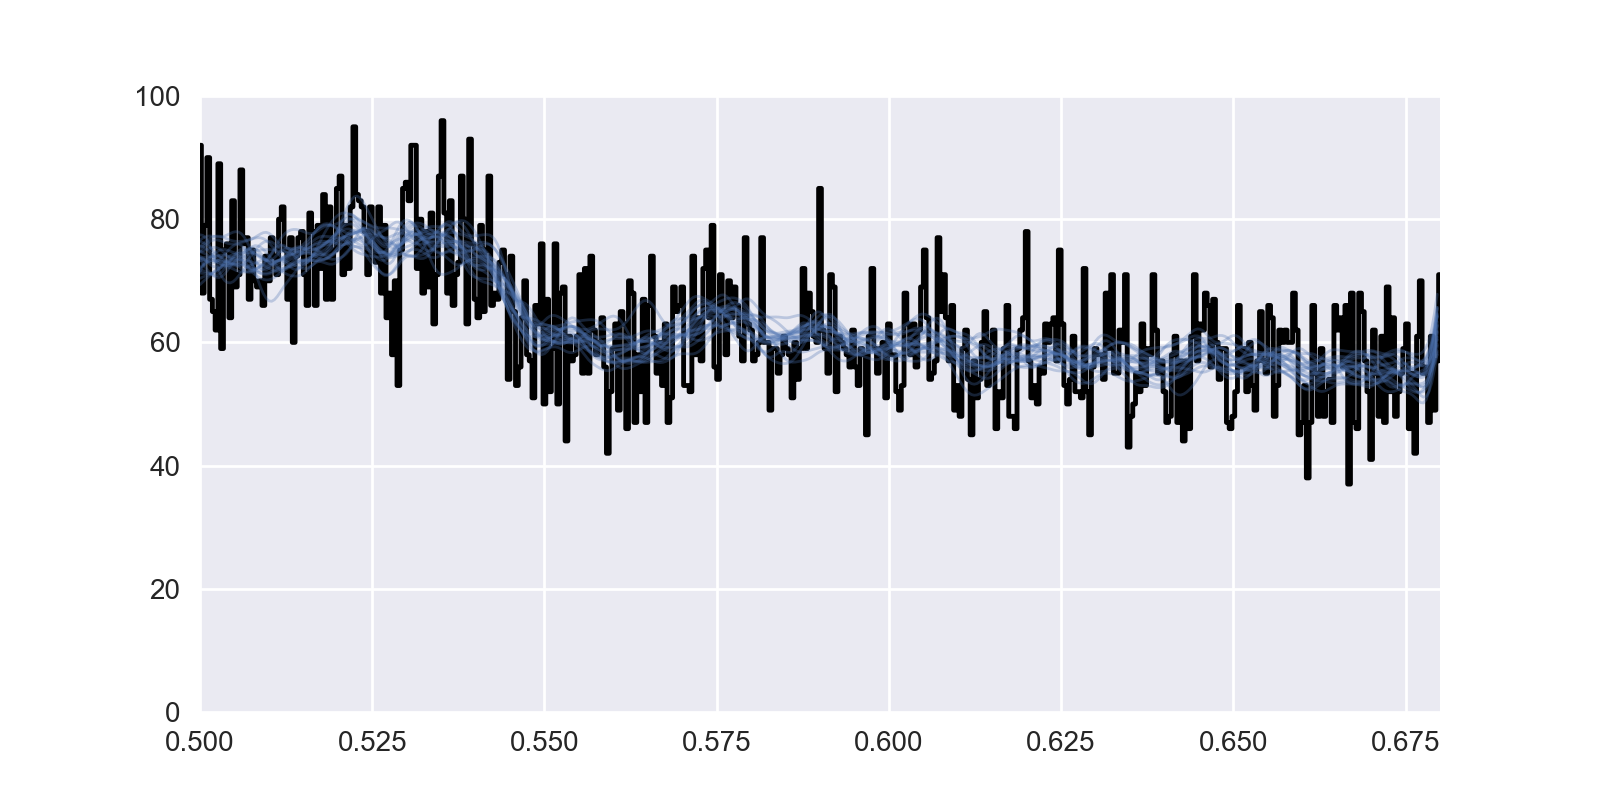

(0, 100)

In [112]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.hist(sample[:,10], bins=50);
ax1.set_title("Number of Doppler Shifts")

ax2.hist(sample[sample[:,11]!= 0.0,11], bins=30)
ax2.set_xlabel("Doppler Shift")
ax2.set_ylabel("p(Doppler Shift)")

plt.figure(figsize=(8,4))
plt.plot(e_low, d.counts, 
         c="black", linestyle="steps-mid")
    
for s in sample[-20:]:
    plt.plot(e_low_small, s[-len(e_low_small):], lw=1, 
             c=sns.color_palette()[0], alpha=0.3)
    
plt.xlim(x_min, x_max)
plt.ylim(0, 100)


In [114]:
len(sample[sample[:,10]!= 0.0,10])/len(sample[:,11])

0.08333333333333333

# Simulation 04

$log(z) = $